<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%EC%A0%9CHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[3 970 970 ... 950 950 'Baseline']
 [3 730 760 ... 240 240 'VT']
 [3 620 940 ... 700 700 'Baseline']
 ...
 [8079 820 490 ... 270 280 'VT']
 [8096 1080 1070 ... 1200 1170 'Baseline']
 [8096 740 740 ... 320 290 'VT']]
(270, 988)
     Sample_number    X1    X2    X3    X4  ...  X983  X984  X985  X986     Class
0                3   970   970   950   970  ...   940   950   950   950  Baseline
1                3   730   760   740   750  ...   230   250   240   240        VT
2                3   620   940   780   780  ...   710   710   700   700  Baseline
3                3   920   920   920   910  ...   280   280   280   280        VT
4                3   870   880   870   890  ...   860   850   850   850  Baseline
..             ...   ...   ...   ...   ...  ...   ...   ...   ...   ...       ...
265           8079  1230  1160  1130  1160  ...   270   270   280   270        VT
266           8079  1050  1030  1050  1060  ...  1050  1070  1080  1070  Baseline
267           8079   820   490  11

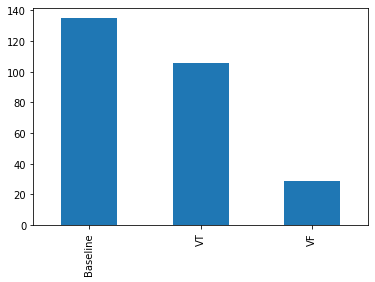

In [ ]:
# 0 사용할 패키지 불러오기
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense, Activation # 케라스의 Dense()를 임포트
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 판다스로 csv파일을 읽어오기
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/heartbeat_datasets.csv")
# csv 파일이 잘 읽히는지 확인
print(df.values)
# 데이터 파악
print(df.values.shape)
# 데이터는 총 270개 샘플로 구성되어져 있으며 988개의 열로 구성
print(df)
# 각 샘플의 인덱스는 986개의 시간별 심장박동률의 열과 심장의 상태를 나타내는 1개의 열이 있다.
# Class열은 몇 가지 데이터로 구성되어져있는지 모든 데이터 종류출력
print("Class 종류:", df["Class"].unique(), sep="\n")
# Class열의 심장 데이터 구성 비율을 파악
df['Class'].value_counts().plot(kind='bar')

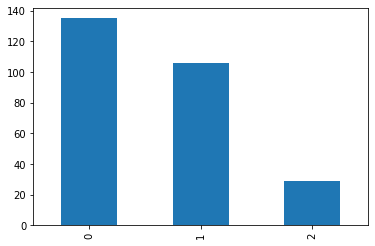

In [ ]:
df['Class'] = df['Class'].replace(['Baseline', 'VT', 'VF'],[0,1,2])
# Baseline은 0 VT는 1 VF는 2로 변환해서 코딩.
df['Class'].value_counts().plot(kind='bar')
#데이터의 분포가 Baseline, VT, VF의 비율이 일정하지 않음

In [ ]:
# 랜덤시드 고정시키기
np.random.seed(5)

# 1 데이터 준비하기
mah_np_array = df.values
dataset = mah_np_array
print(dataset)

[[   3  970  970 ...  950  950    0]
 [   3  730  760 ...  240  240    1]
 [   3  620  940 ...  700  700    0]
 ...
 [8079  820  490 ...  270  280    1]
 [8096 1080 1070 ... 1200 1170    0]
 [8096  740  740 ...  320  290    1]]


In [ ]:
# # 랜덤시드 고정시키기
# np.random.seed(5)

# # 1 데이터 준비하기
# mah_np_array = df.values
# dataset = mah_np_array
# print(dataset)

#3. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=986, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(8, kernel_initializer="uniform", activation='relu'))
model.add(Dense(3, kernel_initializer="uniform", activation='softmax'))

#2 데이터셋 생성하기

# Training and testing dataset 분리, 필요시 validation dataset 분리

# Training dataset
x_train = dataset[50:100,1:-1]
# print(x_train)
y_train = dataset[50:100,-1]
# print(y_train)

# Validation dataset
x_val = dataset[:50,1:-1]
y_val = dataset[:50,-1]
# print(x_val)
# testing dataset
x_test = dataset[100:,1:-1]
y_test = dataset[100:,-1]
# print(y_train, y_val, y_test)

# # 훈련셋, 검증셋 고르기
# train_rand_idxs = np.random.choice(50, 40)
# val_rand_idxs = np.random.choice(50, 40)

# x_train = x_train[train_rand_idxs]
# y_train = y_train[train_rand_idxs]
# x_val = x_val[val_rand_idxs]
# y_val = y_val[val_rand_idxs]

# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

#4 모델컴파일 학습과정 설정하기
# loss 현재 가중치 세트 평가하는데 사용한 손실 함수.
# optimizer 최적의 가중치 검색하는데 사용되는 최적화 알고리즘 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용
# metrics 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi = 60).create(prog='dot', format='svg'))


#5 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 50) # 조기종료 콜백함수 정의
hist= model.fit(x_train, y_train, epochs=1000, batch_size=10,validation_data=(x_val, y_val),callbacks=[early_stopping])


Train on 50 samples, validate on 50 samples
Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.1201 - accuracy: 0.4200 - val_loss: 1.0225 - val_accuracy: 0.5000
Epoch 2/1000
50/50 [==============================] - 0s 387us/step - loss: 1.0165 - accuracy: 0.5000 - val_loss: 0.9170 - val_accuracy: 0.5000
Epoch 3/1000
50/50 [==============================] - 0s 381us/step - loss: 0.9721 - accuracy: 0.5000 - val_loss: 0.9117 - val_accuracy: 0.5000
Epoch 4/1000
50/50 [==============================] - 0s 390us/step - loss: 0.9472 - accuracy: 0.5000 - val_loss: 0.8695 - val_accuracy: 0.5000
Epoch 5/1000
50/50 [==============================] - 0s 337us/step - loss: 0.9524 - accuracy: 0.5000 - val_loss: 0.8623 - val_accuracy: 0.5000
Epoch 6/1000
50/50 [==============================] - 0s 384us/step - loss: 0.9581 - accuracy: 0.5000 - val_loss: 0.8719 - val_accuracy: 0.5000
Epoch 7/1000
50/50 [==============================] - 0s 390us/step - loss: 0.9516 - accuracy:

<Figure size 72x72 with 0 Axes>

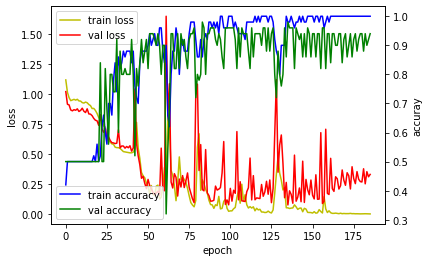

In [ ]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 학습 과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

#6모델 평가하기
scores = model.evaluate(x_test, y_test)
print('loss : ' + str(scores[0]))
print('accuray : ' + str(scores[1]))
print("acc: %f" %(scores[1]*100))
print('')

## training loss and acc ##
[1.1200694561004638, 1.0164950370788575, 0.972108268737793, 0.9472199320793152, 0.952364730834961, 0.9580759286880494, 0.9516008853912353, 0.9585145831108093, 0.9449548721313477, 0.9434582233428955, 0.9307238936424256, 0.9270533323287964, 0.9352627635002136, 0.9296038269996643, 0.9149093747138977, 0.9059302806854248, 0.8813328623771668, 0.8826161980628967, 0.8652329683303833, 0.8404198288917542, 0.8064609885215759, 0.7838234186172486, 0.7869685649871826, 0.7360810875892639, 0.7258922576904296, 0.6496633648872375, 0.6151686787605286, 0.6012907981872558, 0.5867032170295715, 0.5827495992183686, 0.5587046563625335, 0.5550557672977448, 0.5544644355773926, 0.5486380159854889, 0.5355016648769378, 0.5219955503940582, 0.5197340369224548, 0.5166196882724762, 0.5139907956123352, 0.5116036057472229, 0.5118232131004333, 0.5169936180114746, 0.545634001493454, 0.7662951111793518, 0.5518411040306092, 0.4652864396572113, 0.3477374315261841, 0.319372883439064, 0.3033457696437